In [137]:
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
%pylab inline

df=pd.read_csv('Employee_attrition.csv')
df[:5]

Populating the interactive namespace from numpy and matplotlib


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


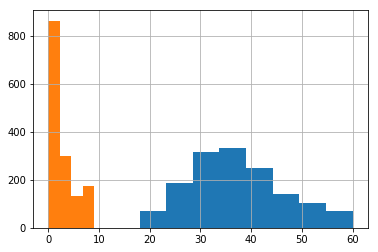

In [138]:
df['Age'].hist(bins=8)
df['NumCompaniesWorked'].hist(bins=4)

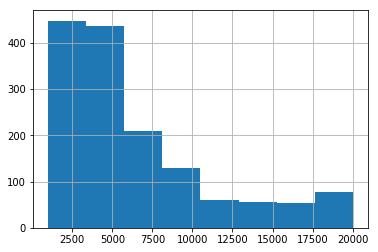

In [139]:
df['MonthlyIncome'].hist(bins=8)

In [140]:
#scatter(df['MonthlyIncome'],df['PercentSalaryHike'])
#scatter(df['MonthlyIncome'],df['YearsAtCompany'])
pd.pivot_table(df,index='EnvironmentSatisfaction',columns='JobSatisfaction',values='Age',aggfunc='count')
#df['BusinessTravel'].value_counts()

JobSatisfaction,1,2,3,4
EnvironmentSatisfaction,,,,
1,53,47,100,84
2,55,59,84,89
3,94,87,128,144
4,87,87,130,142


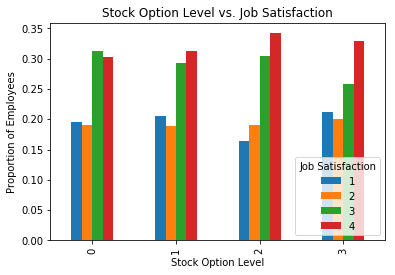

In [141]:
piv_tab=pd.pivot_table(df,index='StockOptionLevel',columns='JobSatisfaction',values='Age',aggfunc='count')

def normalize(s):
    new_tab=s.T
    for row in new_tab:
        new_tab[row]=new_tab[row].astype(float)
        new_tab[row] = (new_tab[row])/sum(new_tab[row])
    return new_tab.T

normalize(piv_tab).plot(kind='bar')
xlabel('Stock Option Level')
ylabel('Proportion of Employees')
legend(title='Job Satisfaction',loc='lower right')
title('Stock Option Level vs. Job Satisfaction')
plt.savefig('Stock Options vs. Job Satisfaction.png')

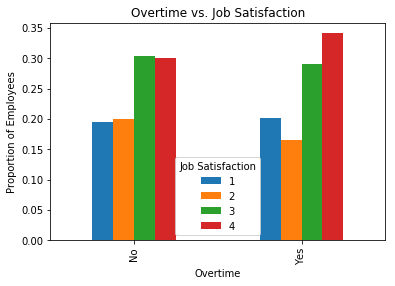

In [157]:
married_df=df[df['MaritalStatus']=='Married']

piv_tab2=pd.pivot_table(df,index='OverTime',columns='JobSatisfaction',values='Age',aggfunc='count')

normalize(piv_tab2).plot(kind='bar')
xlabel('Overtime')
ylabel('Proportion of Employees')
legend(title='Job Satisfaction',loc='lower center')
title('Overtime vs. Job Satisfaction')
plt.savefig('Overtime Pay vs. Job Satisfaction.png')


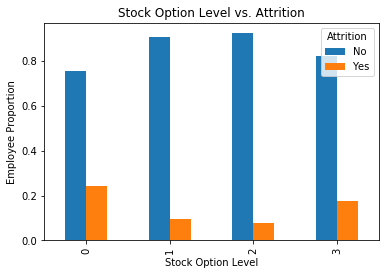

In [173]:
piv_tab3=pd.pivot_table(df,index='StockOptionLevel',columns='Attrition',values='Age',aggfunc='count')
normalize(piv_tab3).plot(kind='bar')
legend(title='Attrition',loc='best')
xlabel('Stock Option Level')
ylabel('Employee Proportion')
title('Stock Option Level vs. Attrition')

plt.savefig('Stock Option Level vs. Attrition.png')


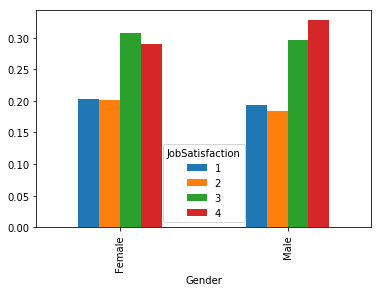

In [144]:
piv_tab4=pd.pivot_table(df,index='Gender',columns='JobSatisfaction',values='Age',aggfunc='count')
normalize(piv_tab4).plot(kind='bar')

In [163]:
from sklearn.model_selection import train_test_split
df['AttritionNum']=(df['Attrition']=='Yes')*1
formula='AttritionNum ~ 0 + C(Gender) + C(Department) + MonthlyIncome + C(WorkLifeBalance) ' + \
           ' + Age + C(JobSatisfaction) + C(BusinessTravel) + C(MaritalStatus) + C(JobRole) + ' + \
            'C(Education)'


Y, X = dmatrices(formula, df, return_type='dataframe')
y = Y['AttritionNum'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

from sklearn import metrics

prediction_train = model.predict(X_train)
print metrics.accuracy_score(y_train, prediction_train)

prediction = model.predict(X_test)
print metrics.accuracy_score(y_test, prediction)

df['AttritionNum'].value_counts()
print 1233.0/(1233+237)

weights = Series(model.coef_[0],
                 index=X.columns.values)
weights.sort_values()


0.8483965014577259
0.8276643990929705
0.838775510204


C(Department)[T.Research & Development]   -0.267314
C(MaritalStatus)[T.Married]               -0.197415
C(JobSatisfaction)[T.4L]                  -0.147873
C(WorkLifeBalance)[T.3L]                  -0.144602
C(JobRole)[T.Research Scientist]          -0.136356
C(JobRole)[T.Manufacturing Director]      -0.127187
C(JobSatisfaction)[T.2L]                  -0.099419
C(Gender)[Female]                         -0.089705
C(WorkLifeBalance)[T.4L]                  -0.082976
C(Education)[T.2L]                        -0.065576
C(BusinessTravel)[T.Travel_Rarely]        -0.056667
C(JobRole)[T.Research Director]           -0.030691
Age                                       -0.030070
C(Education)[T.5L]                        -0.003936
MonthlyIncome                             -0.000082
C(Education)[T.4L]                         0.008022
C(JobRole)[T.Manager]                      0.010683
C(JobRole)[T.Human Resources]              0.028495
C(JobSatisfaction)[T.3L]                   0.028767
C(JobRole)[T

In [164]:
#Cutting out MonthlyIncome

df['AttritionNum']=(df['Attrition']=='Yes')*1
formula='AttritionNum ~ 0 + C(Gender) + C(Department) + C(WorkLifeBalance) ' + \
           ' + Age + C(JobSatisfaction) + C(BusinessTravel) + C(MaritalStatus) + C(JobRole) + ' + \
            'C(Education)'


Y, X = dmatrices(formula, df, return_type='dataframe')
y = Y['AttritionNum'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

from sklearn import metrics

prediction_train = model.predict(X_train)
print metrics.accuracy_score(y_train, prediction_train)

prediction = model.predict(X_test)
print metrics.accuracy_score(y_test, prediction)

df['AttritionNum'].value_counts()
print 1233.0/(1233+237)

weights = Series(model.coef_[0],
                 index=X.columns.values)
weights.sort_values()


0.8542274052478134
0.8321995464852607
0.838775510204


C(WorkLifeBalance)[T.4L]                  -1.145555
C(WorkLifeBalance)[T.3L]                  -0.982173
C(Department)[T.Research & Development]   -0.729951
C(JobSatisfaction)[T.4L]                  -0.704371
C(JobSatisfaction)[T.2L]                  -0.632671
C(WorkLifeBalance)[T.2L]                  -0.600184
C(JobRole)[T.Research Director]           -0.524128
C(Gender)[Female]                         -0.328631
C(JobRole)[T.Manager]                     -0.312933
C(JobRole)[T.Manufacturing Director]      -0.305543
C(JobSatisfaction)[T.3L]                  -0.270645
C(JobRole)[T.Sales Executive]             -0.147586
C(Gender)[Male]                           -0.106557
Age                                       -0.029766
C(Education)[T.2L]                         0.009693
C(MaritalStatus)[T.Married]                0.107408
C(Education)[T.4L]                         0.156319
C(Education)[T.5L]                         0.167202
C(Education)[T.3L]                         0.222014
C(Department

In [166]:
#Cutting out Education

df['AttritionNum']=(df['Attrition']=='Yes')*1
formula='AttritionNum ~ 0 + C(Gender) + C(Department) + C(WorkLifeBalance) ' + \
           ' + Age + C(JobSatisfaction) + C(BusinessTravel) + C(MaritalStatus) + C(JobRole)'


Y, X = dmatrices(formula, df, return_type='dataframe')
y = Y['AttritionNum'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

from sklearn import metrics

prediction_train = model.predict(X_train)
print metrics.accuracy_score(y_train, prediction_train)

prediction = model.predict(X_test)
print metrics.accuracy_score(y_test, prediction)

df['AttritionNum'].value_counts()
print 1233.0/(1233+237)

weights = Series(model.coef_[0],
                 index=X.columns.values)
weights.sort_values()


0.8532555879494655
0.8344671201814059
0.838775510204


C(WorkLifeBalance)[T.4L]                  -1.153571
C(WorkLifeBalance)[T.3L]                  -0.983881
C(JobSatisfaction)[T.4L]                  -0.717836
C(Department)[T.Research & Development]   -0.704858
C(JobSatisfaction)[T.2L]                  -0.630063
C(WorkLifeBalance)[T.2L]                  -0.602772
C(JobRole)[T.Research Director]           -0.517143
C(JobRole)[T.Manufacturing Director]      -0.319632
C(Gender)[Female]                         -0.300463
C(JobRole)[T.Manager]                     -0.289371
C(JobSatisfaction)[T.3L]                  -0.277952
C(JobRole)[T.Sales Executive]             -0.135582
C(Gender)[Male]                           -0.072097
Age                                       -0.028855
C(MaritalStatus)[T.Married]                0.095692
C(Department)[T.Sales]                     0.302000
C(JobRole)[T.Research Scientist]           0.475540
C(JobRole)[T.Human Resources]              0.515939
C(BusinessTravel)[T.Travel_Rarely]         0.703506
C(JobRole)[T

In [171]:
#Adding in Distance from home, hourly rate, envirnonment satisfaction, number of companies work,
#percent salary hike

df['AttritionNum']=(df['Attrition']=='Yes')*1
formula='AttritionNum ~ 0 + C(Gender) + C(Department) + C(WorkLifeBalance) ' + \
           ' + Age + C(JobSatisfaction) + C(BusinessTravel) + C(MaritalStatus) + C(JobRole) + ' + \
            'DistanceFromHome + C(EnvironmentSatisfaction) + NumCompaniesWorked + ' + \
            'PercentSalaryHike'


Y, X = dmatrices(formula, df, return_type='dataframe')
y = Y['AttritionNum'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

from sklearn import metrics

prediction_train = model.predict(X_train)
print metrics.accuracy_score(y_train, prediction_train)

prediction = model.predict(X_test)
print metrics.accuracy_score(y_test, prediction)

df['AttritionNum'].value_counts()
print 1233.0/(1233+237)

weights = Series(model.coef_[0],
                 index=X.columns.values)
weights.sort_values()


0.8629737609329446
0.8276643990929705
0.838775510204


C(WorkLifeBalance)[T.4L]                  -1.044471
C(EnvironmentSatisfaction)[T.3L]          -1.004770
C(WorkLifeBalance)[T.3L]                  -0.932428
C(EnvironmentSatisfaction)[T.4L]          -0.794296
C(EnvironmentSatisfaction)[T.2L]          -0.742659
C(JobSatisfaction)[T.4L]                  -0.686857
C(Department)[T.Research & Development]   -0.665610
C(JobRole)[T.Research Director]           -0.636081
C(JobSatisfaction)[T.2L]                  -0.553565
C(WorkLifeBalance)[T.2L]                  -0.539910
C(JobSatisfaction)[T.3L]                  -0.308187
C(JobRole)[T.Manufacturing Director]      -0.227624
C(JobRole)[T.Sales Executive]             -0.177158
C(JobRole)[T.Manager]                     -0.164358
C(Gender)[Female]                         -0.145221
Age                                       -0.042343
PercentSalaryHike                         -0.032686
DistanceFromHome                           0.044856
NumCompaniesWorked                         0.113864
C(Gender)[Ma